<a href="https://colab.research.google.com/github/syunar/object-detection/blob/main/yolonas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown 1rlMl_R6CDmGe3sY4nEhgAPhk3KVYFIl6 # download kaggle.json

Downloading...
From: https://drive.google.com/uc?id=1rlMl_R6CDmGe3sY4nEhgAPhk3KVYFIl6
To: /content/kaggle.json
100% 66.0/66.0 [00:00<00:00, 262kB/s]


In [2]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c hackathon-online-image-processing

100% 818M/820M [00:05<00:00, 191MB/s]
100% 820M/820M [00:05<00:00, 148MB/s]


In [3]:
!unzip -qq /content/hackathon-online-image-processing.zip

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [5]:
sample_df = pd.read_csv("/content/sample_submission.csv")
sample_df

,id,boxes,labels,scores
0,b7d67e08-d47f-4e38-a32b-cf4a5fdff541.jpg,"[[276, 209, 370, 282]]",[2],[1]
1,1e268dd8-c655-470d-9703-266b288040f0.jpg,[],[],[]
2,3b9fa851-b873-4da6-902c-6ca5d230d410.jpg,[],[],[]
3,7250793f-a2d0-4e40-85d4-7b8230f94604.jpg,NaN,NaN,NaN
4,f1532aca-d9ed-44bc-88cc-54e066616d57.jpg,NaN,NaN,NaN
...,...,...,...,...
495,46510701-c19e-4dc1-acdc-2b319b0ecd65.jpg,NaN,NaN,NaN
496,91eb6a81-19e8-436b-a00b-7f5c4856ede3.jpg,NaN,NaN,NaN
497,553b7dda-1574-44ae-a119-f900d1583e1f.jpg,NaN,NaN,NaN
498,9b0d7081-e297-4a9b-b08f-561490fc41fc.jpg,NaN,NaN,NaN


In [22]:
import pandas as pd

# Replace 'your_json_file.json' with the path to your JSON file
# Alternatively, if you have JSON data as a string, you can pass it directly to the 'json' parameter.
df = pd.read_json('/content/train.json')

# Now you have your JSON data in a pandas DataFrame, and you can work with it as you normally would.
df = df.T
df

,boxes,labels
0.jpg,"[[439, 315, 506, 384]]",[0]
1.jpg,"[[549, 187, 618, 281]]",[0]
3.jpg,"[[293, 254, 315, 273]]",[0]
4.jpg,"[[216, 275, 312, 346], [509, 150, 579, 234]]","[1, 1]"
6.jpg,"[[476, 166, 527, 242]]",[1]
...,...,...
15451.jpg,[],[]
16808.jpg,[],[]
14865.jpg,[],[]
15932.jpg,[],[]


In [25]:
df[:-2006]

,boxes,labels
0.jpg,"[[439, 315, 506, 384]]",[0]
1.jpg,"[[549, 187, 618, 281]]",[0]
3.jpg,"[[293, 254, 315, 273]]",[0]
4.jpg,"[[216, 275, 312, 346], [509, 150, 579, 234]]","[1, 1]"
6.jpg,"[[476, 166, 527, 242]]",[1]
...,...,...
3172.jpg,"[[244, 419, 283, 467]]",[2]
3173.jpg,"[[383, 363, 506, 427]]",[1]
3174.jpg,"[[413, 229, 569, 314]]",[1]
3175.jpg,"[[288, 315, 478, 496]]",[2]


In [11]:
df[:-500]

,boxes,labels
0.jpg,"[[439, 315, 506, 384]]",[0]
1.jpg,"[[549, 187, 618, 281]]",[0]
3.jpg,"[[293, 254, 315, 273]]",[0]
4.jpg,"[[216, 275, 312, 346], [509, 150, 579, 234]]","[1, 1]"
6.jpg,"[[476, 166, 527, 242]]",[1]
...,...,...
15941.jpg,[],[]
16506.jpg,[],[]
15580.jpg,[],[]
17087.jpg,[],[]


In [13]:
import json

# Replace 'your_json_file.json' with the path to your JSON file
with open("/content/train.json") as json_file:
    data_dict = json.load(json_file)

# Now 'data_dict' contains the JSON data from the file as a Python dictionary.
data_dict


{'0.jpg': {'boxes': [[439, 315, 506, 384]], 'labels': [0]},
 '1.jpg': {'boxes': [[549, 187, 618, 281]], 'labels': [0]},
 '3.jpg': {'boxes': [[293, 254, 315, 273]], 'labels': [0]},
 '4.jpg': {'boxes': [[216, 275, 312, 346], [509, 150, 579, 234]],
  'labels': [1, 1]},
 '6.jpg': {'boxes': [[476, 166, 527, 242]], 'labels': [1]},
 '7.jpg': {'boxes': [[326, 220, 355, 248]], 'labels': [1]},
 '8.jpg': {'boxes': [[210, 159, 243, 190]], 'labels': [2]},
 '10.jpg': {'boxes': [[462, 243, 557, 322]], 'labels': [0]},
 '11.jpg': {'boxes': [[242, 171, 301, 225], [413, 311, 592, 394]],
  'labels': [1, 1]},
 '14.jpg': {'boxes': [[518, 156, 610, 259], [424, 258, 448, 295]],
  'labels': [1, 1]},
 '15.jpg': {'boxes': [[321, 196, 354, 228]], 'labels': [0]},
 '16.jpg': {'boxes': [[444, 329, 490, 359]], 'labels': [0]},
 '17.jpg': {'boxes': [[240, 125, 371, 210]], 'labels': [0]},
 '18.jpg': {'boxes': [[245, 317, 306, 411]], 'labels': [0]},
 '21.jpg': {'boxes': [[429, 265, 476, 311]], 'labels': [1]},
 '22.jpg': 

In [43]:
# !pip install super-gradients
%%capture
!git clone https://github.com/Deci-AI/super-gradients.git
!pip install -r /content/super-gradients/requirements.txt

In [44]:
import sys
sys.path.insert(0, "/content/super-gradients/src")
sys.path

['/content/super-gradients/src',
 '/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython']

In [14]:
%%capture
!pip install fiftyone
!pip install prettyformatter
!pip install pylabel
!pip install -U albumentations
#These commands are currently required if running on Google Colab
# %pip uninstall opencv-python-headless
# %pip install opencv-python-headless==4.1.2.30

In [69]:
import json

# Initialize COCO format dictionaries
coco_format = {
    'info': {},
    'licenses': [],
    'images': [],
    'annotations': [],
    'categories': []
}

# Add categories (assuming there are 3 categories with IDs 0, 1, 2)
coco_format['categories'] = [
    {'id': 0, 'name': 'category_0'},
    {'id': 1, 'name': 'category_1'},
    {'id': 2, 'name': 'category_2'}
]

# Loop through each image and its data
image_id = 0
annotation_id = 0
for image_name, image_data in data_dict.items():
    img = Image.open(f"/content/train/train/{image_name}")
    image_id += 1
    image_info = {
        'id': image_id,
        'file_name': image_name,
        'width': img.size[0],  # Set the actual width of the image
        'height': img.size[1]  # Set the actual height of the image
    }
    coco_format['images'].append(image_info)

    # Extract bounding boxes and labels
    boxes = image_data['boxes']
    labels = image_data['labels']

    for i, box in enumerate(boxes):
        annotation_id += 1
        x, y, w, h = box
        category_id = int(labels[i])
        annotation = {
            'id': annotation_id,
            'image_id': image_id,
            'category_id': category_id,
            'bbox': [x, y, w - x, h - y],
            'area': (w - x) * (h - y),
            'iscrowd': 0
        }
        coco_format['annotations'].append(annotation)

# Save COCO format as a JSON file
with open('coco_format.json', 'w') as f:
    json.dump(coco_format, f)


In [71]:
from pylabel import importer
path_to_annotations = "/content/coco_format.json"
path_to_images = "/content/train/train"


#Import the dataset into the pylable schema
dataset = importer.ImportCoco(path_to_annotations, path_to_images=path_to_images, name="my_coco")
# values_to_filter = ['015.jpg', '051.jpg', '033.jpg']
# where = dataset.df['img_filename'].isin(values_to_filter)
# dataset.df = dataset.df[~where]
dataset.df = dataset.df[~(dataset.df["ann_bbox_xmin"] == "")]
dataset.df

,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,ann_bbox_ymin,...,ann_iscrowd,ann_keypoints,ann_pose,ann_truncated,ann_difficult,cat_id,cat_name,cat_supercategory,split,annotated
id,,,,,,,,,,,,,,,,,,,,,
0,/content/train/train,0.jpg,,1,922,692,,,439.0,315.0,...,0.0,,,,,0,category_0,,,1
1,/content/train/train,1.jpg,,2,880,660,,,549.0,187.0,...,0.0,,,,,0,category_0,,,1
2,/content/train/train,3.jpg,,3,880,660,,,293.0,254.0,...,0.0,,,,,0,category_0,,,1
3,/content/train/train,4.jpg,,4,880,660,,,216.0,275.0,...,0.0,,,,,1,category_1,,,1
4,/content/train/train,4.jpg,,4,880,660,,,509.0,150.0,...,0.0,,,,,1,category_1,,,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3037,/content/train/train,3172.jpg,,2596,880,660,,,244.0,419.0,...,0.0,,,,,2,category_2,,,1
3038,/content/train/train,3173.jpg,,2597,880,660,,,383.0,363.0,...,0.0,,,,,1,category_1,,,1
3039,/content/train/train,3174.jpg,,2598,752,564,,,413.0,229.0,...,0.0,,,,,1,category_1,,,1


In [72]:
print(f"Number of images: {dataset.analyze.num_images}")
print(f"Number of classes: {dataset.analyze.num_classes}")
print(f"Distribution of classes:")
dataset.analyze.class_counts

category_1    1414
category_0    1004
category_2     624
Name: cat_name, dtype: int64

Number of images: 2600
Number of classes: 3
Distribution of classes:


In [73]:
dataset.df = dataset.df.reset_index(drop=True)

In [74]:
dataset.export.ExportToYoloV5(output_path='model_training/labels',
                              yaml_file='dataset.yaml',
                              copy_images=True,
                              # use_splits=True,
                              cat_id_index=0)

Exporting YOLO files...:  96%|█████████▋| 2509/2600 [00:15<00:00, 332.52it/s]

['model_training/dataset.yaml',
 'model_training/labels/0.txt',
 'model_training/labels/1.txt',
 'model_training/labels/3.txt',
 'model_training/labels/4.txt',
 'model_training/labels/6.txt',
 'model_training/labels/7.txt',
 'model_training/labels/8.txt',
 'model_training/labels/10.txt',
 'model_training/labels/11.txt',
 'model_training/labels/14.txt',
 'model_training/labels/15.txt',
 'model_training/labels/16.txt',
 'model_training/labels/17.txt',
 'model_training/labels/18.txt',
 'model_training/labels/21.txt',
 'model_training/labels/22.txt',
 'model_training/labels/24.txt',
 'model_training/labels/25.txt',
 'model_training/labels/26.txt',
 'model_training/labels/27.txt',
 'model_training/labels/28.txt',
 'model_training/labels/29.txt',
 'model_training/labels/30.txt',
 'model_training/labels/31.txt',
 'model_training/labels/32.txt',
 'model_training/labels/33.txt',
 'model_training/labels/34.txt',
 'model_training/labels/35.txt',
 'model_training/labels/36.txt',
 'model_training/l

In [75]:
import os
import pathlib
import random
import shutil
import requests
import torch
from PIL import Image
from pathlib import Path
from typing import Union, Dict, List
from sklearn.model_selection import train_test_split
from collections import Counter
from matplotlib import pyplot as plt
import pandas as pd
import cv2
from super_gradients.training import Trainer, dataloaders, models
from super_gradients.training.dataloaders.dataloaders import (
    coco_detection_yolo_format_train, coco_detection_yolo_format_val
)
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import (
    PPYoloEPostPredictionCallback
)

In [76]:
def split_data(data_dir, output_dir, val_ratio=0.1):
    # Create output directories
    output_dir = Path(output_dir)
    output_dir.mkdir(parents=True, exist_ok=True)

    (output_dir/'train/images').mkdir(parents=True, exist_ok=True)
    (output_dir/'train/labels').mkdir(parents=True, exist_ok=True)
    (output_dir/'val/images').mkdir(parents=True, exist_ok=True)
    (output_dir/'val/labels').mkdir(parents=True, exist_ok=True)
    # (output_dir/'test/images').mkdir(parents=True, exist_ok=True)
    # (output_dir/'test/labels').mkdir(parents=True, exist_ok=True)

    # Separate images from annotations
    images = sorted(list((Path(data_dir)/'images').glob('*.jpg')))
    annotations = sorted(list((Path(data_dir)/'labels').glob('*.txt')))

    # Shuffle images and annotations in the same way
    zipped = list(zip(images, annotations))
    random.shuffle(zipped)
    images, annotations = zip(*zipped)

    # Split data into train + val and test
    train_images, val_images, train_annotations, val_annotations = train_test_split(
        images, annotations, test_size=val_ratio, random_state=1)


    # Copy files
    for img, ann in zip(train_images, train_annotations):
        shutil.copy(img, output_dir/'train/images')
        shutil.copy(ann, output_dir/'train/labels')

    for img, ann in zip(val_images, val_annotations):
        shutil.copy(img, output_dir/'val/images')
        shutil.copy(ann, output_dir/'val/labels')


# Usage
split_data('/content/model_training', 'split_data')

Exporting YOLO files...: 100%|██████████| 2600/2600 [00:15<00:00, 166.86it/s]


In [77]:
!pip install torchinfo
from torchinfo import summary

yolo_nas_l = models.get("yolo_nas_s", pretrained_weights="coco")
summary(model=yolo_nas_l,
        input_size=(16, 3, 512, 512),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

[2023-08-05 16:33:14] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2023-08-05 16:33:14] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_s


Layer (type (var_name))                                           Input Shape          Output Shape         Param #              Trainable
YoloNAS_S (YoloNAS_S)                                             [16, 3, 512, 512]    [16, 5376, 4]        --                   True
├─NStageBackbone (backbone)                                       [16, 3, 512, 512]    [16, 96, 128, 128]   --                   True
│    └─YoloNASStem (stem)                                         [16, 3, 512, 512]    [16, 48, 256, 256]   --                   True
│    │    └─QARepVGGBlock (conv)                                  [16, 3, 512, 512]    [16, 48, 256, 256]   3,024                True
│    └─YoloNASStage (stage1)                                      [16, 48, 256, 256]   [16, 96, 128, 128]   --                   True
│    │    └─QARepVGGBlock (downsample)                            [16, 48, 256, 256]   [16, 96, 128, 128]   88,128               True
│    │    └─YoloNASCSPLayer (blocks)                     

In [78]:
class config:
    #trainer params
    EXPERIMENT_NAME = 'liver' #specify the experiment name
    CHECKPOINT_DIR = 'checkpoint' #specify the path you want to save checkpoints to

    #dataset params
    DATA_DIR = '/content/split_data' #parent directory to where data lives

    TRAIN_IMAGES_DIR = 'train/images' #child dir of DATA_DIR where train images are
    TRAIN_LABELS_DIR = 'train/labels' #child dir of DATA_DIR where train labels are

    VAL_IMAGES_DIR = 'val/images' #child dir of DATA_DIR where validation images are
    VAL_LABELS_DIR = 'val/labels' #child dir of DATA_DIR where validation labels are

    CLASSES = ['category_0',
                'category_1',
                'category_2',
               ] #what class names do you have

    NUM_CLASSES = len(CLASSES)

    #dataloader params - you can add whatever PyTorch dataloader params you have
    #could be different across train, val, and test
    DATALOADER_PARAMS={
    'batch_size':32,
    'num_workers':2
    }

    # model params
    MODEL_NAME = 'yolo_nas_s' # choose from yolo_nas_s, yolo_nas_m, yolo_nas_l
    PRETRAINED_WEIGHTS = 'coco' #only one option here: coco

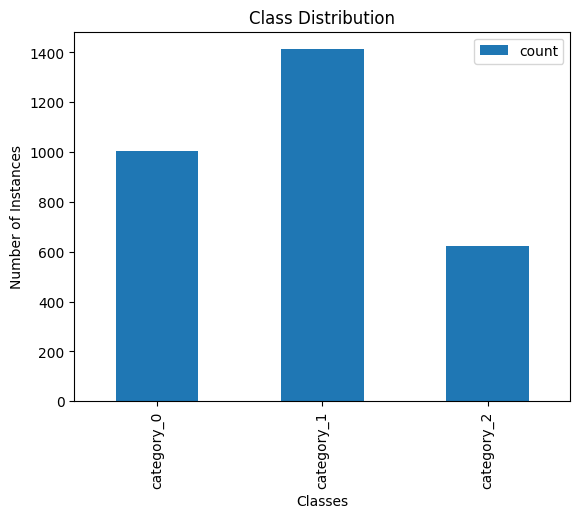

In [80]:
data_dir = Path("/content/split_data")
images_dir = data_dir / "train" / "images"
labels_dir = data_dir / "train" / "labels"

class_names = config.CLASSES

# Read the image file paths and annotations
image_paths = list(images_dir.glob("*.jpg"))
label_paths = sorted(labels_dir.glob("*.txt"))



class_counts = Counter()
for label_file in label_paths:
    with open(label_file, "r") as file:
        lines = file.readlines()
    class_counts.update(Counter([int(float(line.split()[0])) for line in lines]))

# Replace class IDs with class names
class_counts_names = {class_names[int(class_id)]: count for class_id, count in class_counts.items()}

# Create a pandas DataFrame and plot the bar chart
df = pd.DataFrame.from_dict(class_counts_names, orient="index", columns=["count"])
ax = df.plot(kind="bar")
plt.xlabel("Classes")
plt.ylabel("Number of Instances")
plt.title("Class Distribution")
plt.show()

<Axes: >

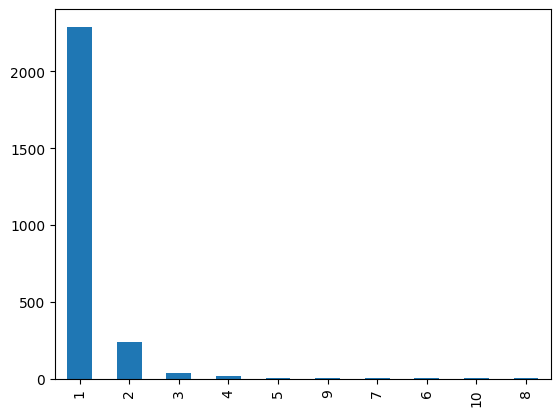

In [81]:
data = []

for file in label_paths:
    with open(file) as f:
        lines = f.readlines()
        num_lines = len(lines)
        unique_values = len(set(list(map(lambda x: x.split()[0], lines))))

        data.append([file, num_lines, unique_values])

df = pd.DataFrame(data, columns=['file', 'num_lines', 'unique_values'])

# distribution of number of detections in an image
df['num_lines'].value_counts().plot(kind='bar')

In [82]:
trainer = Trainer(experiment_name=config.EXPERIMENT_NAME, ckpt_root_dir=config.CHECKPOINT_DIR)

In [83]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [85]:
train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': config.DATA_DIR,
        'images_dir': config.TRAIN_IMAGES_DIR,
        'labels_dir': config.TRAIN_LABELS_DIR,
        'classes': config.CLASSES
    },
    dataloader_params=config.DATALOADER_PARAMS
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': config.DATA_DIR,
        'images_dir': config.VAL_IMAGES_DIR,
        'labels_dir': config.VAL_LABELS_DIR,
        'classes': config.CLASSES
    },
    dataloader_params=config.DATALOADER_PARAMS
)

[2023-08-05 16:37:20] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 2596/2596 [00:01<00:00, 1997.61it/s]
[2023-08-05 16:37:21] WARNING - detection_dataset.py - Found 3038 invalid bbox that were ignored. For more information, please set `show_all_warnings=True`.


EmptyDatasetException: ignored